Data Description:
- The dataset consists of three columns and 100 rows which includes two feature columns and one label column.
- Features columns are in the form of float and continuous values ranges from [-1.131849 to 1.129808] and [-1.289427 to 1.073060] and the means are at [-0.010872 and -0.019289].
- Whereas label is in the form discreate numerical float values that inclueds [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels.
- There are zero duplicates and no null values consists in the dataset.
- Pattern that is formed by the input features is concentirc circles. That means both the circles have common center,one circle  consists of labels as 0 and the other consists of 1.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv(r'C:\Users\chauh\Downloads\2.concerticcir1.csv',header=None)

In [14]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [15]:
data[[0,1]]

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038
...,...,...
95,-0.474862,-0.224981
96,0.126272,0.869784
97,-0.647365,-0.363424
98,0.474405,1.011016


In [16]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,-0.010872,-0.019289,0.500000
std,0.577796,0.542785,0.502519
min,-1.131849,-1.289427,0.000000
25%,-0.450428,-0.433372,0.000000
50%,-0.030343,-0.030291,0.500000
75%,0.425418,0.420430,1.000000
max,1.129808,1.073060,1.000000


In [17]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

<Axes: xlabel='0', ylabel='1'>

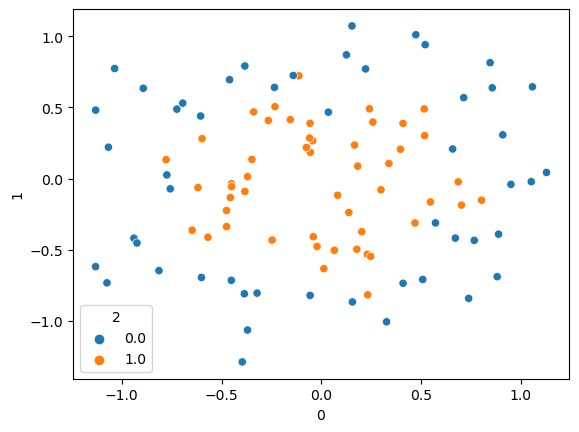

In [20]:
sns.scatterplot(data=data,x=0,y=1,hue=2)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [22]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

In [52]:
model=Sequential()
model.add(Dense(6,activation="relu",kernel_initializer='random_uniform',input_dim=2))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu",kernel_initializer='random_uniform'))
model.add(Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 18        
                                                                 
 dropout_7 (Dropout)         (None, 6)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 28        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 0.6934 - accuracy: 0.4722 - val_loss: 0.6943 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6935 - val_accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6937 - val_accuracy: 0.3333
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6946 - val_accuracy: 0.3333
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6927 - accuracy: 0.5139 - val_loss: 0.6947 - val_accuracy: 0.3333
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6926 - accuracy: 0.5139 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6924 - accuracy: 0.5139 - val_loss: 0.6941 - val_accuracy: 0.3333
Epoch 8/100
8/8 [===

8/8 [==============================] - 0s 14ms/step - loss: 0.6451 - accuracy: 0.6944 - val_loss: 0.6721 - val_accuracy: 0.6111
Epoch 60/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6387 - accuracy: 0.7361 - val_loss: 0.6690 - val_accuracy: 0.6111
Epoch 61/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6440 - accuracy: 0.7361 - val_loss: 0.6631 - val_accuracy: 0.6111
Epoch 62/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.6667 - val_loss: 0.6600 - val_accuracy: 0.6111
Epoch 63/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6440 - accuracy: 0.6944 - val_loss: 0.6580 - val_accuracy: 0.6111
Epoch 64/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6379 - accuracy: 0.7639 - val_loss: 0.6559 - val_accuracy: 0.6111
Epoch 65/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6370 - accuracy: 0.7222 - val_loss: 0.6545 - val_accuracy: 0.6111
Epoch 66/100
8/8 [===========

In [56]:
y_cap=model.predict(x_testf)

1/1 [==============================] - 0s 88ms/step


In [57]:
y_capf=np.where(y_cap>0.5,1,0)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8

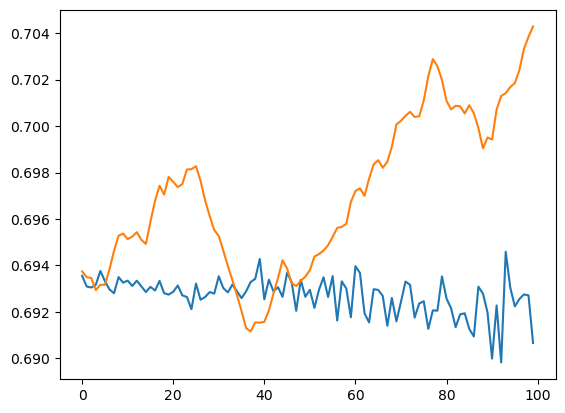

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [64]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [21]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 19s 2ms/step


<Axes: >

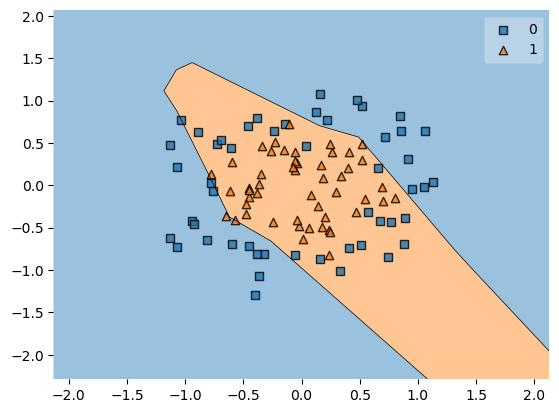

In [73]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)